# EDA 

In [2]:
import pandas as pd 

fraud_data = pd.read_csv("/Users/michaelhirschberger/Documents/Vehicle Insurance Claim Fraud Detection/fraud_oracle.csv")

In [3]:
fraud_data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [5]:
fraud_data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [6]:
fraud_data.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [27]:
fraud_data.isnull().mean() * 100

Month                   0.0
WeekOfMonth             0.0
DayOfWeek               0.0
Make                    0.0
AccidentArea            0.0
DayOfWeekClaimed        0.0
MonthClaimed            0.0
WeekOfMonthClaimed      0.0
Sex                     0.0
MaritalStatus           0.0
Age                     0.0
Fault                   0.0
PolicyType              0.0
VehicleCategory         0.0
VehiclePrice            0.0
FraudFound_P            0.0
PolicyNumber            0.0
RepNumber               0.0
Deductible              0.0
DriverRating            0.0
Days_Policy_Accident    0.0
Days_Policy_Claim       0.0
PastNumberOfClaims      0.0
AgeOfVehicle            0.0
AgeOfPolicyHolder       0.0
PoliceReportFiled       0.0
WitnessPresent          0.0
AgentType               0.0
NumberOfSuppliments     0.0
AddressChange_Claim     0.0
NumberOfCars            0.0
Year                    0.0
BasePolicy              0.0
Date                    0.0
dtype: float64

In [7]:
fraud_data['Date'] = pd.to_datetime(fraud_data['Month'] + ' ' + fraud_data['Year'].apply(str))

In [8]:
fraud_data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Date
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,1994-12-01
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,1994-01-01
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,1994-10-01
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,1994-06-01
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,1994-01-01


In [9]:
%%time
import seaborn as sns



CPU times: user 473 ms, sys: 112 ms, total: 585 ms
Wall time: 1.33 s


In [29]:
fraud_data['FraudFound_P'].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

In [28]:
fraud_data['FraudFound_P'].value_counts(normalize=True)

0    0.940143
1    0.059857
Name: FraudFound_P, dtype: float64

In [11]:
fraudulent_claims = fraud_data[fraud_data['FraudFound_P'] == 1]

In [12]:
fraudulent_claims.shape

(923, 34)

Urban    0.896368
Rural    0.103632
Name: AccidentArea, dtype: float64

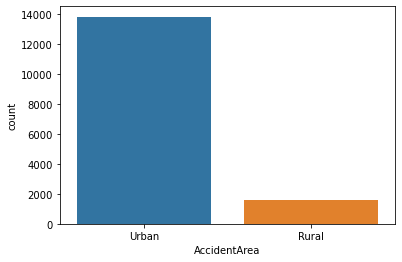

In [13]:
sns.countplot(x=fraud_data['AccidentArea'])
fraud_data['AccidentArea'].value_counts(normalize=True)

Urban    0.855905
Rural    0.144095
Name: AccidentArea, dtype: float64

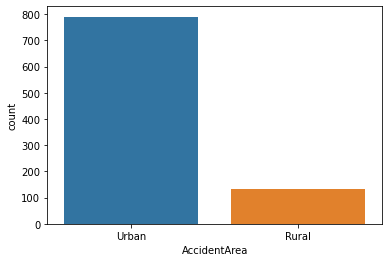

In [14]:
sns.countplot(x=fraudulent_claims['AccidentArea'])
fraudulent_claims['AccidentArea'].value_counts(normalize=True)

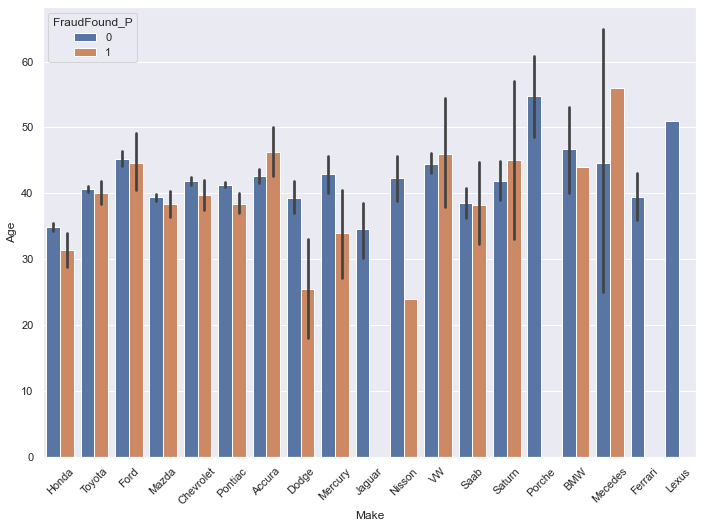

In [44]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
make_age = sns.barplot(data=fraud_data, x="Make", y="Age", hue="FraudFound_P")
make_age.tick_params(axis='x', labelrotation=45)

In [31]:
fraud_data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'Date'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Count'>

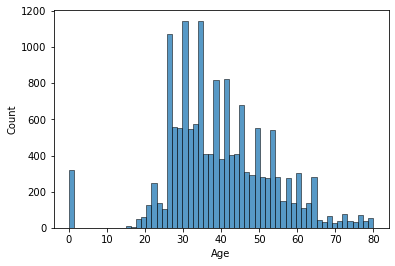

In [34]:
sns.histplot(fraud_data["Age"])

Male      0.843061
Female    0.156939
Name: Sex, dtype: float64

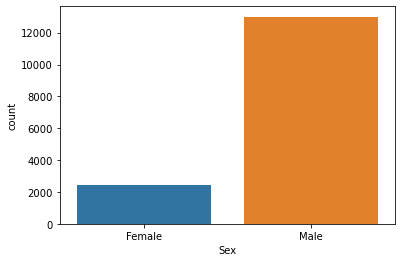

In [15]:
sns.countplot(x=fraud_data['Sex'])
fraud_data['Sex'].value_counts(normalize=True)

Male      0.886241
Female    0.113759
Name: Sex, dtype: float64

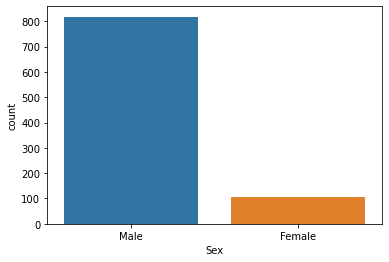

In [16]:
sns.countplot(x=fraudulent_claims['Sex'])
fraudulent_claims['Sex'].value_counts(normalize=True)

<AxesSubplot:xlabel='Sex', ylabel='count'>

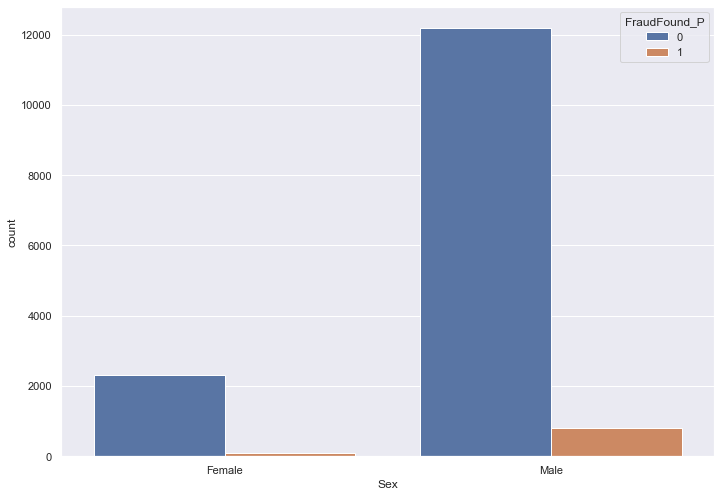

In [49]:
sns.countplot(data=fraud_data, x="Sex", hue="FraudFound_P")

Married     0.689040
Single      0.303761
Divorced    0.004929
Widow       0.002270
Name: MaritalStatus, dtype: float64

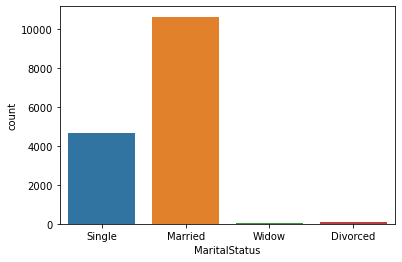

In [17]:
sns.countplot(x=fraud_data['MaritalStatus'])
fraud_data['MaritalStatus'].value_counts(normalize=True)

Married     0.692308
Single      0.301192
Divorced    0.003250
Widow       0.003250
Name: MaritalStatus, dtype: float64

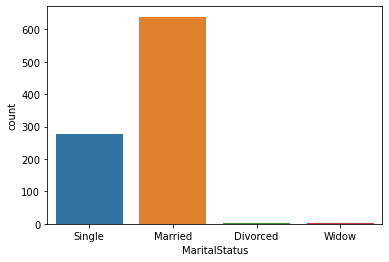

In [18]:
sns.countplot(x=fraudulent_claims['MaritalStatus'])
fraudulent_claims['MaritalStatus'].value_counts(normalize=True)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

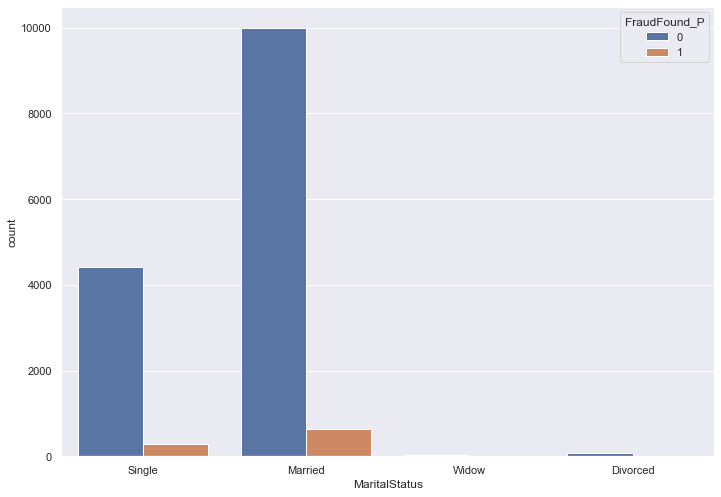

In [58]:
sns.countplot(data=fraud_data, x="MaritalStatus", hue="FraudFound_P")

In [51]:
fraud_data_cleaned = fraud_data[fraud_data['Age'] >= 16]

39.0

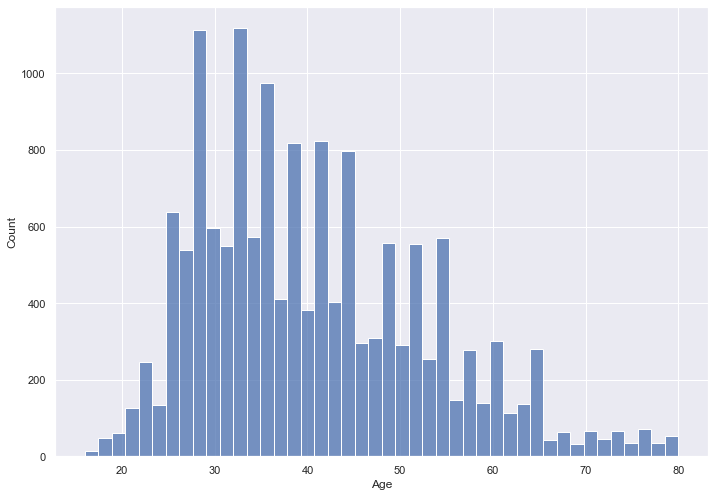

In [52]:
sns.histplot(fraud_data_cleaned['Age'])
fraud_data_cleaned['Age'].median()

36.0

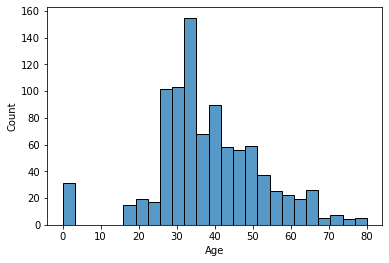

In [20]:
sns.histplot(fraudulent_claims['Age'])
fraudulent_claims['Age'].median()

<AxesSubplot:xlabel='Age', ylabel='Count'>

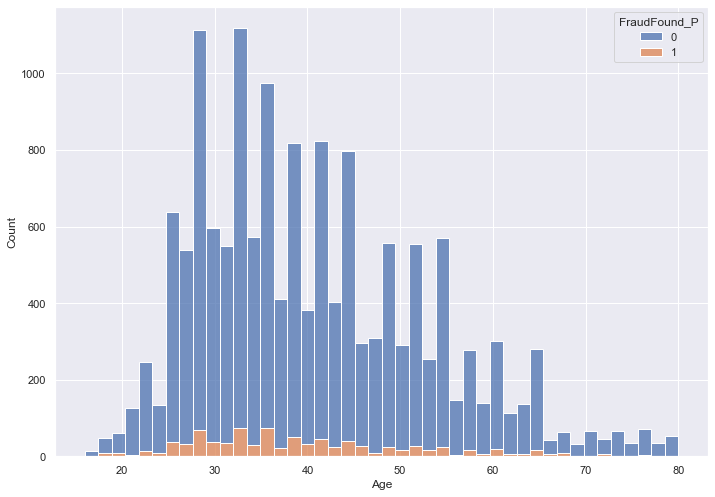

In [56]:
sns.histplot(data=fraud_data_cleaned, x="Age", hue="FraudFound_P", multiple="stack")

In [21]:
claims_per_month = fraud_data.groupby(pd.Grouper(key='Date', axis=0, freq='M')).size()
fraud_claims_per_month = fraudulent_claims.groupby(pd.Grouper(key='Date', axis=0, freq='M')).size()

In [22]:
monthly_claims_plot = pd.DataFrame({"Num Claims per Month": claims_per_month, "Num Fraudulent Claims per Month": fraud_claims_per_month})

In [23]:
monthly_claims_plot

,Num Claims per Month,Num Fraudulent Claims per Month
Date,,
1994-01-31,608,48
1994-02-28,528,36
1994-03-31,584,56
1994-04-30,533,47
1994-05-31,569,52
1994-06-30,543,47
1994-07-31,495,32
1994-08-31,470,56
1994-09-30,441,9


<AxesSubplot:xlabel='Date', ylabel='Num Claims per Month'>

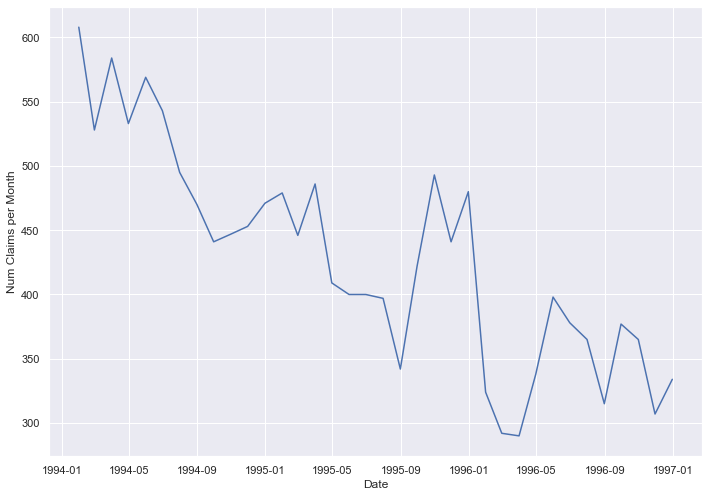

In [59]:
import matplotlib.pyplot as plt
sns.lineplot(data=monthly_claims_plot['Num Claims per Month'])

<AxesSubplot:xlabel='Date', ylabel='Num Fraudulent Claims per Month'>

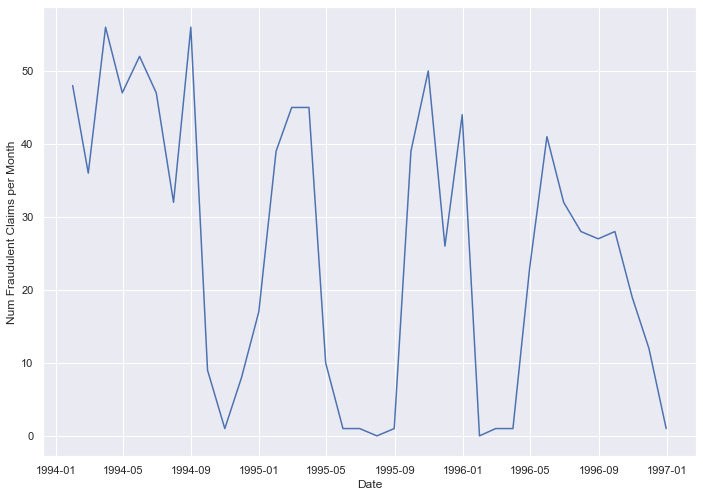

In [60]:
sns.lineplot(data=monthly_claims_plot['Num Fraudulent Claims per Month'])

In [61]:
corr_table = fraud_data.corr()

<AxesSubplot:>

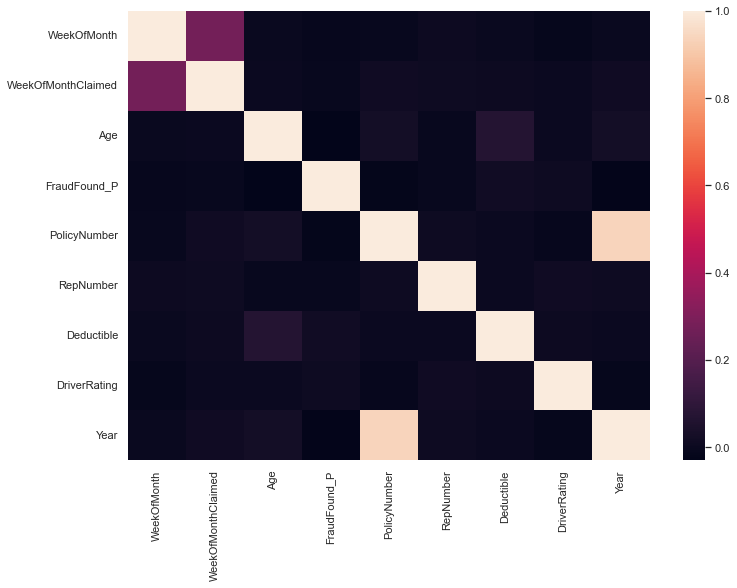

In [62]:
sns.heatmap(corr_table)